In [92]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Load normalized data into data variable
dw_data = np.load("science2k-doc-word.npy")
wd_data = np.load("science2k-word-doc.npy")

def generate_elbow_graph(data):
    #Using elbow method : https://bl.ocks.org/rpgove/0060ff3b656618e9136b
    sse= {}
    for i in range(2,21):
        model = KMeans(n_clusters=i)
        model.fit(data)
        sse[i] = model.inertia_
    sse
    sse_tuples = sorted(sse.items()) 
    x, y = zip(*sse_tuples) #retrieve x,y values

    plt.plot(x, y, marker='x')
    plt.show()

    
def find_closest_points(num_means, data):
    model = KMeans(n_clusters=num_means)
    model.fit(data)

    closest_points = {}
    for i in range(0,num_means):
        distances = model.transform(data)[:,i]
        indices = np.argsort(distances)[::][:10]
        closest_points[i] = indices

    return closest_points

def get_output_labels(filename,closest_points):
    output = []
    with open(filename) as f:
        output = f.read().splitlines() 

    output_dict = {}
    for i in range(0,len(closest_points.keys())):
        output_dict[i] = []
        for j in closest_points[i]:
            output_dict[i].append(output[j])
            
    return output_dict

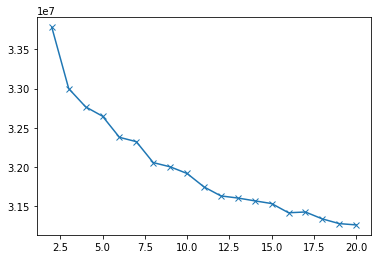

In [78]:
generate_elbow_graph(dw_data)

In [88]:
dw_closest_points = find_closest_points(8,dw_data)

#Using elbow method we can see that the best mean is for k values between 6 and 8
#We choose k=8

In [93]:
#Load titles  into title variable
title_dict = get_output_labels('science2k-titles.txt',dw_closest_points)
title_dict


{0: ['"Inhibition of Eukaryotic DNA Replication by Geminin Binding to Cdt1"',
  '"Activation of the DNA Replication Checkpoint through RNA Synthesis by Primase"',
  '"Rab1 Recruitment of p115 into a cis-SNARE Complex: Programming Budding COPII Vesicles for Fusion"',
  '"Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment"',
  '"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"',
  '"ER-to-Golgi Traffic: This Bud\'s for You"',
  '"Active Remodeling of Somatic Nuclei in Egg Cytoplasm by the Nucleosomal ATPase ISWI"',
  '"Replication Meets Cohesion"',
  '"Coupling of Stress in the ER to Activation of JNK Protein Kinases by Transmembrane Protein Kinase IRE1"',
  '"Thermal, Catalytic, Regiospecific Functionalization of Alkanes"'],
 1: ['"Algorithmic Gladiators Vie for Digital Glory"',
  '"Information Technology Takes a Different Tack"',
  '"Reopening the Darkest Chapter in German Science"',
  '"Archaeology in the Holy Land"',
  '"Sc

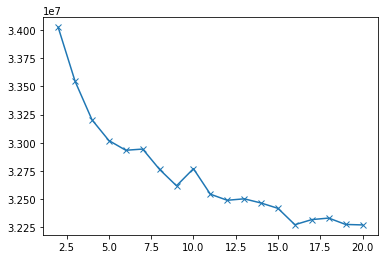

In [81]:
generate_elbow_graph(wd_data)


In [64]:
wd_closest_points = find_closest_points(8,wd_data)


{0: ['"Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae"',
  '"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"',
  '"Algorithmic Gladiators Vie for Digital Glory"',
  '"Thermal, Catalytic, Regiospecific Functionalization of Alkanes"',
  '"Reopening the Darkest Chapter in German Science"',
  '"Similar Requirements of a Plant Symbiont and a Mammalian Pathogen for Prolonged Intracellular Survival"',
  '"Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment"',
  '"Turning up the Heat on Histoplasma capsulatum"',
  '"Mothers Setting Boundaries"',
  '"An Arresting Start for MAPK"'],
 1: ['"The Mouse House as a Recruiting Tool"',
  '"Information Technology Takes a Different Tack"',
  '"Reopening the Darkest Chapter in German Science"',
  '"Vaccine Studies Stymied by Shortage of Animals"',
  '"Algorithmic Gladiators Vie for Digital Glory"',
  '"The Boom in Biosafety Labs"',
  '"Nati

In [94]:
#Load vocab into vocab dict
vocab_dict = get_output_labels('science2k-vocab.txt',dw_closest_points)
vocab_dict

{0: ['nitrogen',
  'fault',
  'organic',
  'transgenic',
  'exhibit',
  'staining',
  'dendrites',
  'needed',
  'animals',
  'cross'],
 1: ['expressing',
  'release',
  'volume',
  'fig',
  'width',
  'right',
  'mediated',
  'cells',
  'land',
  'obtained'],
 2: ['hand',
  'exhibit',
  'transgenic',
  'class',
  'expressing',
  'able',
  'cross',
  'detect',
  'clock',
  'volume'],
 3: ['tail',
  'expressing',
  'nature',
  'cross',
  'right',
  'volume',
  'fish',
  'nuclei',
  'product',
  'gfp'],
 4: ['expressing',
  'volume',
  'mediated',
  'states',
  'receptor',
  'described',
  'right',
  'fig',
  'release',
  'recognition'],
 5: ['second',
  'tail',
  'requires',
  'volume',
  'fluid',
  'proliferation',
  'complexes',
  'expressing',
  'trend',
  'cycles'],
 6: ['circadian',
  'monkeys',
  'cross',
  'expressing',
  'hand',
  'distance',
  'act',
  'needed',
  'velocity',
  'staining'],
 7: ['expressing',
  'volume',
  'right',
  'defined',
  'cross',
  'described',
  'rece